In [ ]:
from sklearn.datasets import load_digits
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split

In [ ]:
x,y = load_digits(n_class=10, return_X_y=True)

X_train, X_test, Y_train, Y_test = train_test_split(x,y)

In [ ]:
from sklearn.neighbors import KNeighborsClassifier 
knn = KNeighborsClassifier()
knn.fit(X_train, Y_train)
Y_pred_knn = knn.predict(X_test)

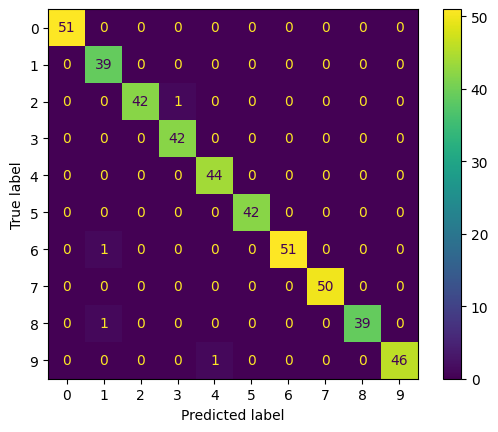

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
cmknn = confusion_matrix(Y_test, Y_pred_knn, labels=[0,1,2,3,4,5,6,7,8,9])
cmknn
cdknn = ConfusionMatrixDisplay(cmknn, display_labels=knn.classes_)

cdknn.plot()

#Principal component analysis (PCA)

In [ ]:
from sklearn.decomposition import PCA
pca=PCA(n_components=8)
pca.fit(x)

PCA(n_components=8)

In [ ]:
pca.explained_variance_ratio_, pca.n_features_in_

(array([0.14890594, 0.13618771, 0.11794594, 0.08409979, 0.05782414,
        0.04916909, 0.04315984, 0.03661363]),
 64)

In [ ]:
Xred=pca.transform(x)
Xred.shape

(1797, 8)

In [ ]:
Xred_train, Xred_test, Y_train, Y_test = train_test_split(Xred,y)

In [ ]:
knn.fit(Xred_train, Y_train)
Y_pred_knn = knn.predict(Xred_test)

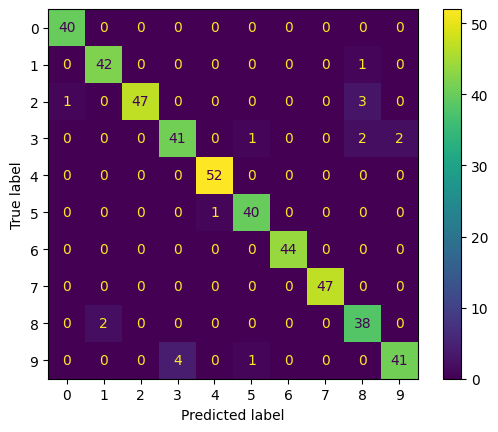

In [ ]:
cmknn = confusion_matrix(Y_test, Y_pred_knn, labels=[0,1,2,3,4,5,6,7,8,9])
cmknn
cdknn = ConfusionMatrixDisplay(cmknn)

cdknn.plot()

In [ ]:
from sklearn.ensemble import RandomForestClassifier

rfc = RandomForestClassifier()
rfc.fit(Xred_train, Y_train)
Y_pred_rfc = rfc.predict(Xred_test)

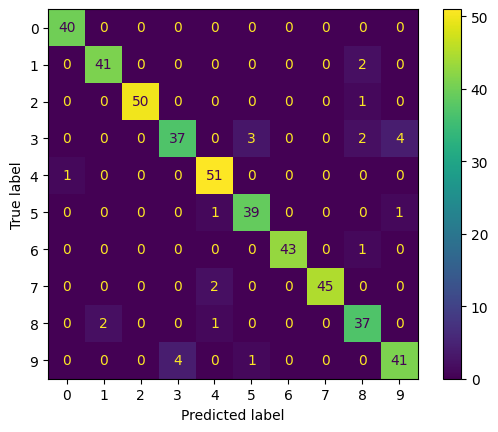

In [ ]:
cmrfc = confusion_matrix(Y_test, Y_pred_rfc, labels=[0,1,2,3,4,5,6,7,8,9])
cmrfc
cdrfc = ConfusionMatrixDisplay(cmrfc)

cdrfc.plot()

In [ ]:
!pip install scikit-optimize

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import skopt
from sklearn.neural_network import MLPClassifier
from skopt import BayesSearchCV
x,y = load_digits(n_class=10, return_X_y=True)

X_train, X_test, Y_train, Y_test = train_test_split(x,y)

opt = BayesSearchCV(
    MLPClassifier(), 
    {
        'activation': ["tanh", "relu"],
        "solver":["adam", "lbfgs", "sgd"]
    },
    n_iter = 20,
    cv = 3
)
opt.fit(X_train, Y_train)
print("val. score %s" %opt.best_score_)
print("test. score %s" %opt.score(X_test, Y_test))

print("best params %s" %str(opt.best_params_))

/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:

val. score 0.9688195991091314
test. score 0.9888888888888889
best params OrderedDict([('activation', 'tanh'), ('solver', 'adam')])


In [ ]:
from sklearn.svm import SVC
from skopt.space import Real, Categorical, Integer
import skopt
from sklearn.neural_network import MLPClassifier
from skopt import BayesSearchCV
digits = load_digits()
X_train, X_test, Y_train, Y_test = train_test_split(digits['data'], digits['target'], test_size=0.2)

opt = BayesSearchCV(
    SVC(), 
    {
        'kernel': ['linear', 'rbf', 'sigmoid'],
        'gamma': ['scale', 'auto'],
        'decision_function_shape': ['ovo', 'ovr']
    },
    n_iter=20,
)
opt.fit(X_train, Y_train)
print("val. score %s" %opt.best_score_)
print("test. score %s" %opt.score(X_test, Y_test))

print("best params %s" %str(opt.best_params_))

/usr/local/lib/python3.9/dist-packages/skopt/optimizer/optimizer.py:449: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "
/usr/local/lib/python3.9/dist-packages/skopt/optimizer/optimizer.py:449: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "
/usr/local/lib/python3.9/dist-packages/skopt/optimizer/optimizer.py:449: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "
/usr/local/lib/python3.9/dist-packages/skopt/optimizer/optimizer.py:449: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "
/usr/local/lib/python3.9/dist-packages/skopt/optimizer/optimizer.py:449: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "


val. score 0.9839890631049167
test. score 0.9861111111111112
best params OrderedDict([('decision_function_shape', 'ovo'), ('gamma', 'scale'), ('kernel', 'rbf')])


#Regresja - ceny nieruchomosci w Kalifornii

In [ ]:
from sklearn.datasets import fetch_california_housing
X,Y = fetch_california_housing(return_X_y=True)

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y)

In [ ]:
from sklearn.neural_network import MLPRegressor
mlp_reg = MLPRegressor()

mlp_reg.fit(X_train, Y_train)

MLPRegressor()

In [ ]:
Yreg_pred = mlp_reg.predict(X_test)

In [ ]:
from sklearn.metrics import explained_variance_score
explained_variance_score(Y_test, Yreg_pred)

0.6024766955904111

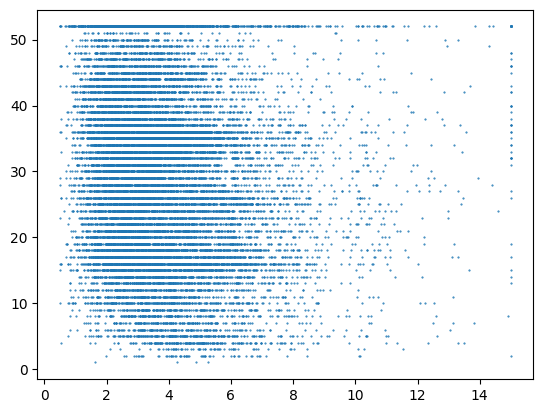

In [ ]:
from matplotlib import pyplot as plt
plt.scatter(X[:,0], X[:,1], marker=".", s=1)

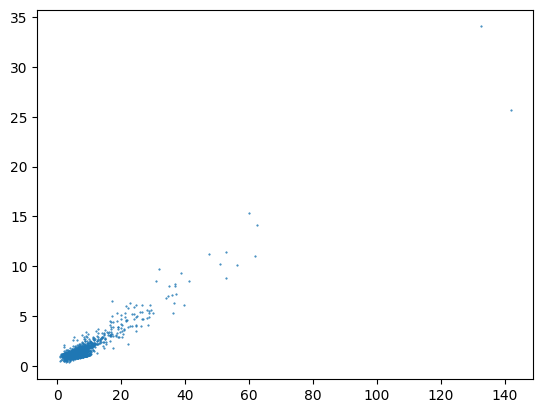

In [ ]:
from matplotlib import pyplot as plt
plt.scatter(X[:,2], X[:,3], marker=".", s=1)

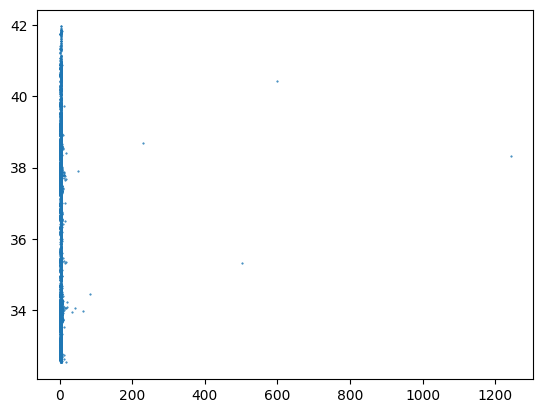

In [ ]:
from matplotlib import pyplot as plt
plt.scatter(X[:,5], X[:,6], marker=".", s=1)

In [ ]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler
scaler = StandardScaler()
X_std = scaler.fit_transform(X)
Xstd_train, Xstd_test, Y_train, Y_test = train_test_split(X_std, Y)

In [ ]:
from sklearn.neural_network import MLPRegressor
mlp_reg = MLPRegressor()

mlp_reg.fit(Xstd_train, Y_train)

MLPRegressor()

In [ ]:
Yreg_pred = mlp_reg.predict(Xstd_test)
explained_variance_score(Y_test, Yreg_pred)

0.7729487195873768

In [ ]:
scaler = MinMaxScaler()
X_std = scaler.fit_transform(X)
Xstd_train, Xstd_test, Y_train, Y_test = train_test_split(X_std, Y)
from sklearn.neural_network import MLPRegressor
mlp_reg = MLPRegressor()

mlp_reg.fit(Xstd_train, Y_train)
Yreg_pred = mlp_reg.predict(Xstd_test)
explained_variance_score(Y_test, Yreg_pred)

/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


0.6839313312162569

#Klasyfikacja na przypadku realistycznym - lasy

In [ ]:
from sklearn.datasets import fetch_covtype

data = fetch_covtype()

In [ ]:
data.DESCR

".. _covtype_dataset:\n\nForest covertypes\n-----------------\n\nThe samples in this dataset correspond to 30×30m patches of forest in the US,\ncollected for the task of predicting each patch's cover type,\ni.e. the dominant species of tree.\nThere are seven covertypes, making this a multiclass classification problem.\nEach sample has 54 features, described on the\n`dataset's homepage <https://archive.ics.uci.edu/ml/datasets/Covertype>`__.\nSome of the features are boolean indicators,\nwhile others are discrete or continuous measurements.\n\n**Data Set Characteristics:**\n\n    =================   ============\n    Classes                        7\n    Samples total             581012\n    Dimensionality                54\n    Features                     int\n    =================   ============\n\n:func:`sklearn.datasets.fetch_covtype` will load the covertype dataset;\nit returns a dictionary-like 'Bunch' object\nwith the feature matrix in the ``data`` member\nand the target values i

In [ ]:
data.feature_names

['Elevation',
 'Aspect',
 'Slope',
 'Horizontal_Distance_To_Hydrology',
 'Vertical_Distance_To_Hydrology',
 'Horizontal_Distance_To_Roadways',
 'Hillshade_9am',
 'Hillshade_Noon',
 'Hillshade_3pm',
 'Horizontal_Distance_To_Fire_Points',
 'Wilderness_Area_0',
 'Wilderness_Area_1',
 'Wilderness_Area_2',
 'Wilderness_Area_3',
 'Soil_Type_0',
 'Soil_Type_1',
 'Soil_Type_2',
 'Soil_Type_3',
 'Soil_Type_4',
 'Soil_Type_5',
 'Soil_Type_6',
 'Soil_Type_7',
 'Soil_Type_8',
 'Soil_Type_9',
 'Soil_Type_10',
 'Soil_Type_11',
 'Soil_Type_12',
 'Soil_Type_13',
 'Soil_Type_14',
 'Soil_Type_15',
 'Soil_Type_16',
 'Soil_Type_17',
 'Soil_Type_18',
 'Soil_Type_19',
 'Soil_Type_20',
 'Soil_Type_21',
 'Soil_Type_22',
 'Soil_Type_23',
 'Soil_Type_24',
 'Soil_Type_25',
 'Soil_Type_26',
 'Soil_Type_27',
 'Soil_Type_28',
 'Soil_Type_29',
 'Soil_Type_30',
 'Soil_Type_31',
 'Soil_Type_32',
 'Soil_Type_33',
 'Soil_Type_34',
 'Soil_Type_35',
 'Soil_Type_36',
 'Soil_Type_37',
 'Soil_Type_38',
 'Soil_Type_39']

In [ ]:
data.data

array([[2.596e+03, 5.100e+01, 3.000e+00, ..., 0.000e+00, 0.000e+00,
        0.000e+00],
       [2.590e+03, 5.600e+01, 2.000e+00, ..., 0.000e+00, 0.000e+00,
        0.000e+00],
       [2.804e+03, 1.390e+02, 9.000e+00, ..., 0.000e+00, 0.000e+00,
        0.000e+00],
       ...,
       [2.386e+03, 1.590e+02, 1.700e+01, ..., 0.000e+00, 0.000e+00,
        0.000e+00],
       [2.384e+03, 1.700e+02, 1.500e+01, ..., 0.000e+00, 0.000e+00,
        0.000e+00],
       [2.383e+03, 1.650e+02, 1.300e+01, ..., 0.000e+00, 0.000e+00,
        0.000e+00]])

#Zad dom klasyfikacja danych + optymalizacja parametrow + wiadomosc na teamsach z wykresem

In [2]:
from sklearn.datasets import fetch_covtype

data = fetch_covtype()

In [3]:
!pip install scikit-optimize

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 100.3/100.3 kB 3.9 MB/s eta 0:00:00


In [ ]:
from sklearn.model_selection import train_test_split
from skopt import BayesSearchCV
import skopt
from sklearn.neural_network import MLPClassifier
from skopt import BayesSearchCV
import numpy as np

import warnings
warnings.filterwarnings('ignore', message='The objective has been evaluated at this point before.')

# n_samples = int(data.data.shape[0] * 0.05)
# X, y = data.data[:n_samples, :], data.target[:n_samples]

# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
#X_train, X_test, y_train, y_test = train_test_split(data.data, data.target, test_size=0.2)
n_samples = int(data.data.shape[0] * 0.2)

random_indices = np.random.choice(data.data.shape[0], n_samples, replace=False)
X, y = data.data[random_indices, :], data.target[random_indices]
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2)

opt = BayesSearchCV(
    MLPClassifier(), 
    {
        'activation': ["tanh", "relu"],
        "solver":["adam", "lbfgs", "sgd"],
        "batch_size": [64,128,256]
    },
    n_iter = 20,
    cv = 3
)
opt.fit(X_train, y_train)
print("val. score %s" %opt.best_score_)
print("test. score %s" %opt.score(X_test, y_test))

print("best params %s" %str(opt.best_params_))

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:693: UserWarning: Training interrupted by user.
  warnings.warn("Training interrupted by user.")


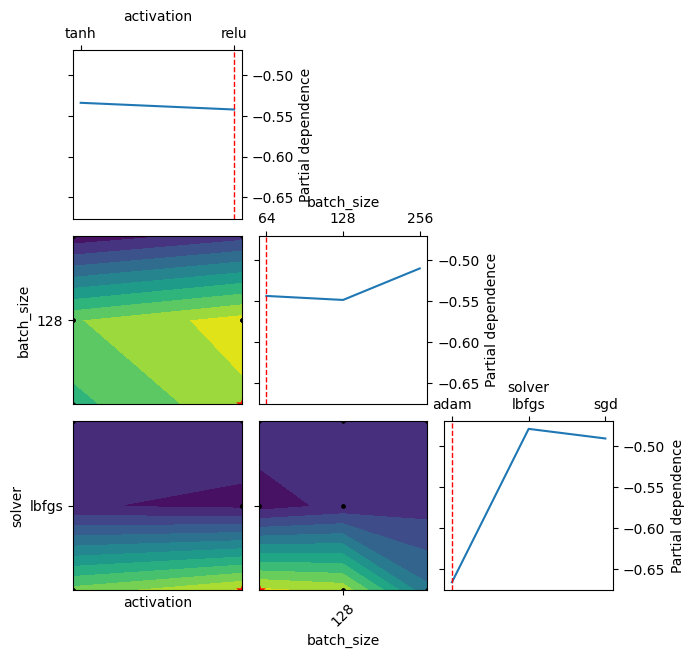

In [ ]:
from skopt.plots import plot_objective
from matplotlib import pyplot as plt
k = plot_objective(opt.optimizer_results_[0], n_minimum_search=int(1e8))
plt.show()